# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     794.9
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           1.28e-39
Time:                        19:22:47   Log-Likelihood:                -2.5700
No. Observations:                  50   AIC:                             13.14
Df Residuals:                      46   BIC:                             20.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0041      0.091     55.282      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50262414  4.99913583  5.45372803  5.8369542   6.12999491  6.32774982
  6.43967563  6.48823236  6.50519327  6.52642459  6.58599278  6.71056753
  6.91503999  7.20007621  7.5520077   7.94507712  8.34567017  8.71783826
  9.02920484  9.25628471  9.38834261  9.42915699  9.39639919  9.31873013
  9.23109137  9.16896435  9.16254083  9.23176253  9.38304472  9.60822222
  9.88589095 10.18492449 10.46958813 10.70540995 10.86484446 10.93179825
 10.90427409 10.79469907 10.62788287 10.43694159 10.25785687 10.12356423
 10.05854181 10.07478873 10.16985365 10.32723749 10.51910424 10.7108543
 10.86680908 10.95607294]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.94478676 10.79160279 10.51771002 10.17139547  9.81622187  9.51546525
  9.3166228   9.23978387  9.2727114   9.373838  ]


## Plot comparison

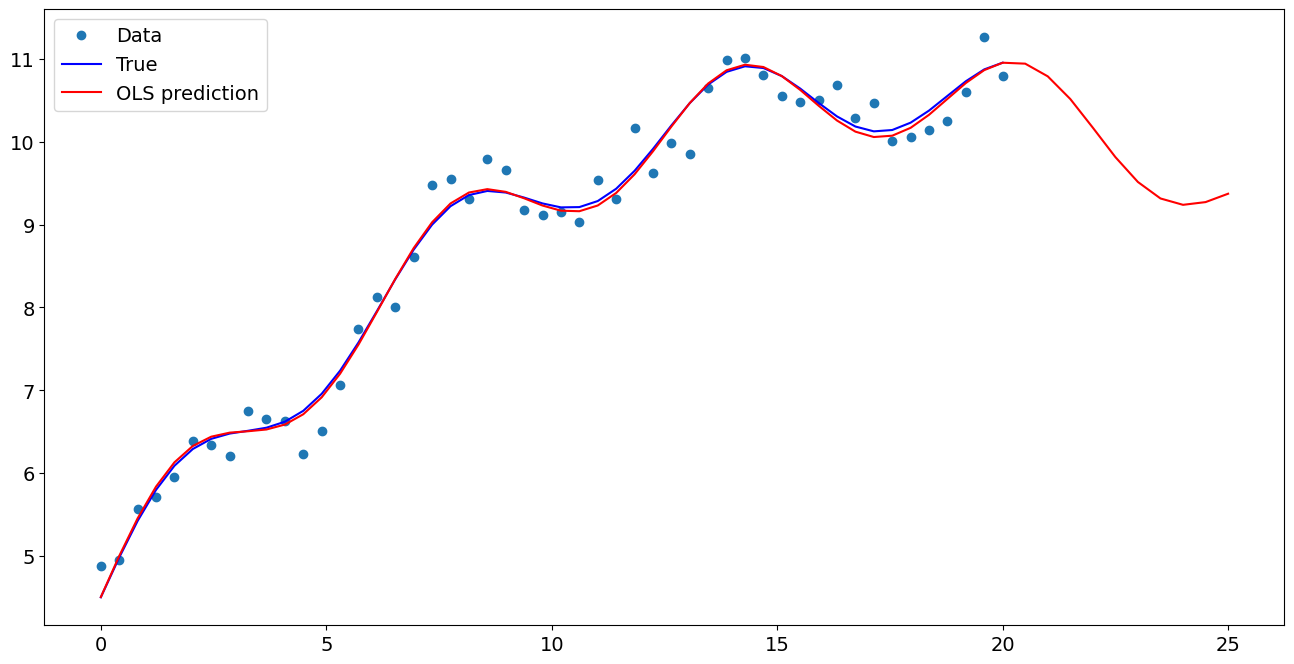

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.004123
x1                  0.498608
np.sin(x1)          0.540312
I((x1 - 5) ** 2)   -0.020060
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.944787
1    10.791603
2    10.517710
3    10.171395
4     9.816222
5     9.515465
6     9.316623
7     9.239784
8     9.272711
9     9.373838
dtype: float64